In [1]:
# To get started, let's import the libraries.
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import time
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from timeit import default_timer as timer

## 1. Gather the Data

We will obtain data from three sources, a manually downloaded csv file, a programmatically downloaded tsv file and data scraped from the Twitter API.

### 1.1 Twitter Archive

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 1.2 Image Predictions

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [6]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 API Data

In [8]:
consumer_key = '' # Hidden
consumer_secret = '' # Hidden
access_token = '' # Hidden
access_secret = '' # Hidden

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 282


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 341


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [11]:
df_3 = pd.DataFrame(columns=['tweet_id', 'text', 'time', 'text_range', 'retweet_counts', 'favorite_counts', 'language'])
with open('tweet_json.txt') as f:
    for line in f:
        tweet  = json.loads(line)
        tweet_id = tweet['id_str']
        text = tweet['full_text']
        time = tweet['created_at']
        text_range = tweet['display_text_range']
        retweet_counts = tweet['retweet_count']
        favorite_counts = tweet['favorite_count']
        language = tweet['lang']
        df_3 = df_3.append(pd.DataFrame([[tweet_id, text, time, text_range, retweet_counts, favorite_counts, language]],
                                        columns=['tweet_id', 'text', 'time', 'text_range', 'retweet_counts', 'favorite_counts', 'language']))
df_3 = df_3.reset_index(drop=True)
df_3

,tweet_id,text,time,text_range,retweet_counts,favorite_counts,language
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",8058,37369,en
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",5986,32131,en
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",3956,24223,en
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",8226,40678,en
4,891327558926688256,This is Franklin. He would like you to stop ca...,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]",8911,38904,en
5,891087950875897856,Here we have a majestic great white breaching ...,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]",2964,19559,en
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]",1956,11421,en
7,890729181411237888,When you watch your owner call another dog a g...,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]",17968,63004,en
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]",4062,26900,en
9,890240255349198849,This is Cassie. She is a college pup. Studying...,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]",7009,30833,en


## 2. Assess Data

### Twitter Archive (df_1 dataframe)

In [12]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Image Predictions

In [15]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### API Data (df_3 dataframe)

In [18]:
df_3.head()

,tweet_id,text,time,text_range,retweet_counts,favorite_counts,language
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",8058,37369,en
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",5986,32131,en
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",3956,24223,en
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",8226,40678,en
4,891327558926688256,This is Franklin. He would like you to stop ca...,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]",8911,38904,en


In [19]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 7 columns):
tweet_id           2334 non-null object
text               2334 non-null object
time               2334 non-null object
text_range         2334 non-null object
retweet_counts     2334 non-null object
favorite_counts    2334 non-null object
language           2334 non-null object
dtypes: object(7)
memory usage: 127.7+ KB


In [20]:
df_3.describe()

,tweet_id,text,time,text_range,retweet_counts,favorite_counts,language
count,2334,2334,2334,2334,2334,2334,2334
unique,2334,2334,2334,143,1716,1997,9
top,817536400337801217,This is Buddy. His father was a bear and his m...,Thu Jul 21 23:53:04 +0000 2016,"[0, 140]",241,0,en
freq,1,1,1,252,4,165,2316


## 2.1 Quality issues (not all issues will be cleaned)

### 2.1.1 twitter archive (df_1 dataframe)

* tweet_id is an integer
* timestamp and retweeted_status_timestamp are currently of type 'float64'
* source is in HTML format with a and \a tags surrounding the text
* name has values that are the string "None" instead of NaN
* doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN and merge those columns into 'dog_stage' column

* some names(in 'name' column) are inaccurate such as "a", "an", "the", "very", "by", etc.
* delete unnecessary columns: 'in_reply_to_status_id' and 'in_reply_to_status_id', 'retweet_status_id', 'retweeted_status_user_id'
* Rating numerators have not been properly cleaned.

### 2.1.2 image_predictions dataframe

* tweet_id is an integer
* p1,p2 and p3 have unnessary underscore instead of space.
* p1,p2 and p3 have inconsisitent capital words

### 2.1.3 API data (df_3 dataframe)

* delete repeated column('name')

## 2.2 Tidiness issues

### 2.2.1 twitter archive(df_1 dataframe)
* 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

### 2.2.2 image predictions

* image_predictions data should be combined with the df_1 data since they are information about the same tweet

### 2.2.3 API data(df_3 dataframe)

* df_3 data could be combined with the df_1 data as well as well since they are information about the same tweet

In [21]:
df_3.language.value_counts()

en     2316
und       7
nl        3
in        3
et        1
es        1
ro        1
tl        1
eu        1
Name: language, dtype: int64

## 3. Copy original pieces of data prior to cleaning

In [22]:
# Make copies of the dataframes for cleaning

df_1_clean = df_1.copy()
image_predictions_clean = image_predictions.copy()
df_3_clean = df_3.copy()

## 4. Clean

### 4.1 Quality Issues

__4.1.1. Define__

Remove 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'  column in df_1_clean

__Code__

In [23]:
df_1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace=True)

__Test__

In [24]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


__4.1.2 Define__

Remove rating numerators and rating denominator in text column after updating those numbers into the existing columns(df_1_clean.rating_numerator and df_1_clean.rating_numerator)

In [25]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [26]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


In [27]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


__Code__

In [28]:
ratings = df_1_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings.head()

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10


In [29]:
df_1_clean['rating_numerator'] = ratings[0].astype(np.float64)
df_1_clean['rating_denominator'] = ratings[1].astype(np.float64)

In [30]:
pat = r"((?:\d+\.)?\d+)\/(\d+)"
df_1_clean['text'] = df_1_clean['text'].str.replace(pat, '')

__Test__

In [31]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [32]:
df_1_clean['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.  https://t.co/MgUWQ76dJU"

__4.1.3 Define__

Convert datatype of tweet_id column(df_1_clean, image_predictions_clean, df_3_clean)

__Code__

In [33]:
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
df_3_clean['tweet_id'] = df_3_clean['tweet_id'].astype(str)

__Test__

In [34]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null float64
rating_denominator       2356 non-null float64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(4), object(10)
memory usage: 257.8+ KB


In [35]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [36]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 7 columns):
tweet_id           2334 non-null object
text               2334 non-null object
time               2334 non-null object
text_range         2334 non-null object
retweet_counts     2334 non-null object
favorite_counts    2334 non-null object
language           2334 non-null object
dtypes: object(7)
memory usage: 127.7+ KB


__4.1.4 Define__

Extract pure text from the a tags in values in 'source' column.

__Code__

In [37]:
df_1_clean['source'] = df_1_clean['source'].str.extract('([A-Z][a-zA-Z- ]+)', expand = True)

__Test__

In [38]:
df_1_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

__4.1.5 Define__

Find all names that start with a lowercase letter

__Code__

In [39]:
# Find all names that start with a lowercase letter

lowercase_names = []
for row in df_1_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
        
print(lowercase_names)

# https://github.com/ursulahneumann/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [40]:
# Replace all names that start with a lowercase letter with a NaN
df_1_clean['name'].replace(lowercase_names, np.nan, inplace = True)

# Replace all 'None's with a NaN
df_1_clean['name'].replace('None', np.nan, inplace = True)

__Test__

In [41]:
df_1_clean.name.value_counts()

Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
Toby          7
Daisy         7
Buddy         7
Bailey        7
Koda          6
Scout         6
Oscar         6
Leo           6
Jack          6
Jax           6
Bella         6
Rusty         6
Dave          6
Stanley       6
Milo          6
Alfie         5
Oakley        5
Chester       5
Louis         5
Bentley       5
             ..
Florence      1
Saydee        1
Fillup        1
Newt          1
Henry         1
Toffee        1
Einstein      1
Cedrick       1
Norman        1
Bayley        1
Blakely       1
Emanuel       1
Gustaf        1
Eevee         1
Tupawc        1
Jonah         1
Julius        1
Skittle       1
Rizzo         1
Corey         1
Sweets        1
Sojourner     1
Harvey        1
Blanket       1
Berkeley      1
Mimosa        1
Jett          1
Holly         1
Alexander     1
Spencer       1
Name: name, Length: 931,

__4.1.6 Define__

Replace underscores in p1,p2 and p3 columns to spaces.And captialize the first letter of each word in those columns.

__Code__

In [42]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()

__Test__

In [43]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


__4.1.7 Define__

Remove unnecessary values in 'timestamp' column. and convert its datatype to DateTime.

__Code__

In [44]:
df_1_clean['timestamp'] = df_1_clean['timestamp'].str.slice(stop=19)
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

__Test__

In [45]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


__4.1.8 Define__

Delete repeated column('name') in df_3_column

__Code__

In [46]:
df_3_clean.drop('text', axis = 1, inplace=True)

__Test__

In [47]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


__4.1.9 Define__

Extract pure text from the a tags in values in 'source' column.

__Code__

__Test__

In [48]:
df_1_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### 4.2 Tidiness Issues

__4.2.1 Define__

Convert 'None' or np.NaN to empty string and merge multiple dog stages.

__Code__

In [49]:
df_1_clean.loc[:,'doggo':'puppo']

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


In [50]:
df_1_clean.doggo.replace('None', '', inplace=True) and df_1_clean.doggo.replace(np.NaN, '', inplace=True)
df_1_clean.floofer.replace('None', '', inplace=True) and df_1_clean.floofer.replace(np.NaN, '', inplace=True)
df_1_clean.pupper.replace('None', '', inplace=True) and df_1_clean.pupper.replace(np.NaN, '', inplace=True)
df_1_clean.puppo.replace('None', '', inplace=True) and df_1_clean.puppo.replace(np.NaN, '', inplace=True)

In [51]:
df_1_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


In [52]:
df_1_clean.loc[:,'doggo':'puppo']

,doggo,floofer,pupper,puppo
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
5,,,,
6,,,,
7,,,,
8,,,,
9,doggo,,,


In [53]:
df_1_clean['stage'] = df_1_clean.doggo + df_1_clean.floofer + df_1_clean.pupper + df_1_clean.puppo
df_1_clean.loc[df_1_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_1_clean.loc[df_1_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_1_clean.loc[df_1_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [54]:
df_1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,,,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,,,,,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,,,,doggo


In [55]:
df_1_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1, inplace=True)

__Test__

In [56]:
df_1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


In [57]:
df_1_clean.stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

__4.2.2 Define__

Merge df_1_clean and df_3_clean

__Code__

In [58]:
first_merge = pd.merge(df_1_clean, df_3_clean, on = 'tweet_id')

__Test__

In [59]:
first_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2333
Data columns (total 16 columns):
tweet_id                 2334 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2334 non-null datetime64[ns]
source                   2334 non-null object
text                     2334 non-null object
expanded_urls            2275 non-null object
rating_numerator         2334 non-null float64
rating_denominator       2334 non-null float64
name                     1488 non-null object
stage                    2334 non-null object
time                     2334 non-null object
text_range               2334 non-null object
retweet_counts           2334 non-null object
favorite_counts          2334 non-null object
language                 2334 non-null object
dtypes: datetime64[ns](1), float64(4), object(11)
memory usage: 310.0+ KB


__4.2.3 Define__

Merge first_merge and image_predictions_clean

__Code__

In [60]:
final_merge = pd.merge(first_merge, image_predictions_clean, on = 'tweet_id')

__Test__

In [61]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 0 to 2061
Data columns (total 27 columns):
tweet_id                 2062 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2062 non-null datetime64[ns]
source                   2062 non-null object
text                     2062 non-null object
expanded_urls            2062 non-null object
rating_numerator         2062 non-null float64
rating_denominator       2062 non-null float64
name                     1387 non-null object
stage                    2062 non-null object
time                     2062 non-null object
text_range               2062 non-null object
retweet_counts           2062 non-null object
favorite_counts          2062 non-null object
language                 2062 non-null object
jpg_url                  2062 non-null object
img_num                  2062 non-null int64
p1                       2062 non-null object
p1_conf     

In [62]:
# Replace all names that start with a lowercase letter with a NaN
df_1_clean['name'].replace(lowercase_names, np.nan, inplace = True)

# Replace all 'None's with a NaN
df_1_clean['name'].replace('None', np.nan, inplace = True)

## 5. Save & Store New Clean Dataset

In [63]:
final_merge.to_csv('twitter_archive_master.csv', index = False)

## 6. Analyze & Visualize Data

In [64]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 0 to 2061
Data columns (total 27 columns):
tweet_id                 2062 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2062 non-null datetime64[ns]
source                   2062 non-null object
text                     2062 non-null object
expanded_urls            2062 non-null object
rating_numerator         2062 non-null float64
rating_denominator       2062 non-null float64
name                     1387 non-null object
stage                    2062 non-null object
time                     2062 non-null object
text_range               2062 non-null object
retweet_counts           2062 non-null object
favorite_counts          2062 non-null object
language                 2062 non-null object
jpg_url                  2062 non-null object
img_num                  2062 non-null int64
p1                       2062 non-null object
p1_conf     

In [65]:
final_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [66]:
final_merge.loc[:,'time':'jpg_url'].head()

,time,text_range,retweet_counts,favorite_counts,language,jpg_url
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",8058,37369,en,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",5986,32131,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",3956,24223,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",8226,40678,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]",8911,38904,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


### __5.1 (Q1) What breed is the most popular (favorites, retweets)?__

In [67]:
tweet_breed = final_merge.groupby('p1')['retweet_counts','favorite_counts'].sum().sort_values(by = ['retweet_counts','favorite_counts'], ascending=False).reset_index()
tweet_breed.head()

,p1,retweet_counts,favorite_counts
0,Golden Retriever,540374,1627824
1,Labrador Retriever,382510,1023774
2,Pembroke,259425,957489
3,Chihuahua,229684,664258
4,Samoyed,186659,494740


In [68]:
breeds = tweet_breed['p1'][0:9]
retweets = tweet_breed['retweet_counts'][0:9]
favorites = tweet_breed['favorite_counts'][0:9]
xpos = np.arange(len(breeds))

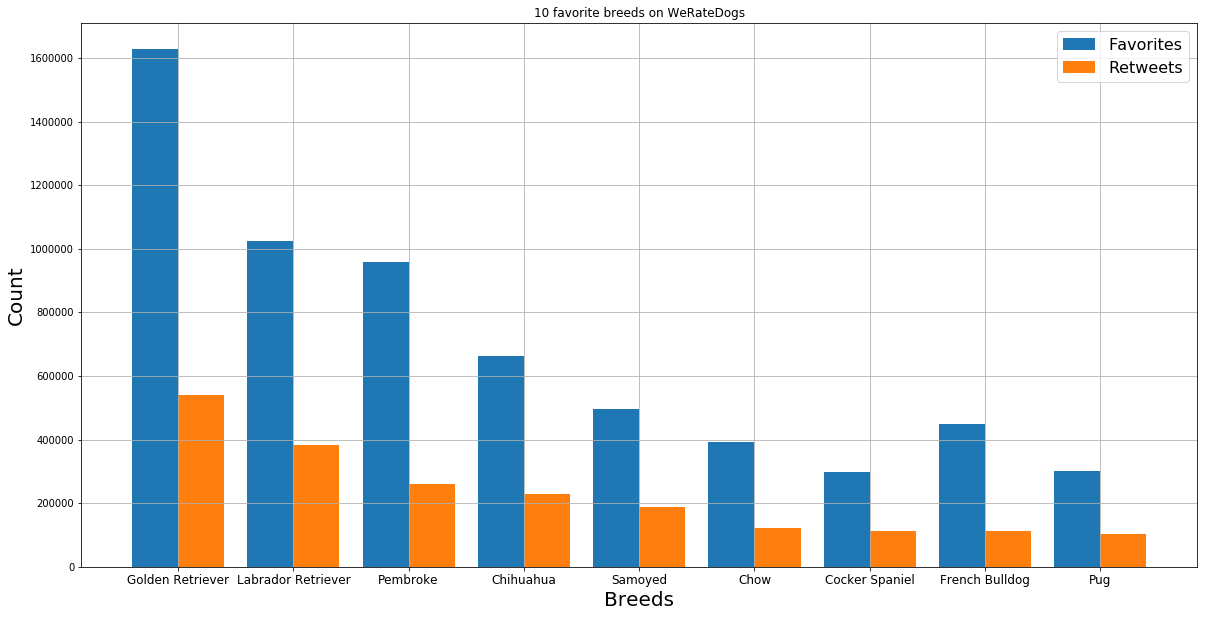

In [69]:
plt.figure(figsize=(20,10))
plt.xticks(xpos, breeds, fontsize = 12)
plt.bar(xpos-0.2, favorites, width = 0.4, label = 'Favorites')
plt.bar(xpos+0.2, retweets, width = 0.4, label = 'Retweets')
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Breeds', fontsize= 20)
plt.title('10 favorite breeds on WeRateDogs')
plt.legend(fontsize = 16)
plt.grid()

plt.show()

In [70]:
print('{} is the most popular one!'.format(tweet_breed['p1'][0]))

Golden Retriever is the most popular one!


### __5.2 (Q2) Where do the tweets come from?__

In [71]:
tweet_source = final_merge['source'].value_counts().reset_index()
tweet_source

,index,source
0,Twitter for iPhone,2022
1,Twitter Web Client,30
2,TweetDeck,10


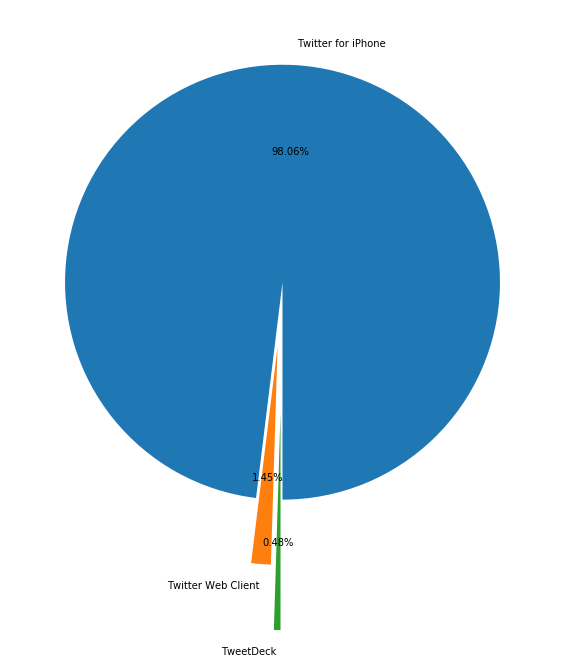

In [72]:
plt.figure(figsize=(20,10))
plt.pie(tweet_source['source'],
        labels = tweet_source['index'],
        autopct='%0.2f%%',
        explode = [0,0.3,0.6], 
        startangle=270)
plt.show()

From the Pie Chart above, it is obvious that most of the people access the page via Twitter iPhone app.

### __5.3 (Q3) Is there any relationship between favorites and retweets?__

In [73]:
final_merge.loc[:,'time':'jpg_url'].head()

,time,text_range,retweet_counts,favorite_counts,language,jpg_url
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",8058,37369,en,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",5986,32131,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",3956,24223,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",8226,40678,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]",8911,38904,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [74]:
tweet_corr = final_merge.loc[:,'retweet_counts':'favorite_counts']
tweet_corr.head()

,retweet_counts,favorite_counts
0,8058,37369
1,5986,32131
2,3956,24223
3,8226,40678
4,8911,38904


In [75]:
final_merge[final_merge['favorite_counts'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,13.0,10.0,Lilly,...,1,Labrador Retriever,0.908703,True,Seat Belt,0.057091,False,Pug,0.011933,True
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,https://twitter.com/rachel2195/status/87685077...,14.0,10.0,NaN,...,1,Irish Setter,0.364729,True,Golden Retriever,0.202907,True,Irish Terrier,0.107473,True
107,867072653475098625,NaN,NaN,2017-05-23 17:40:04,Twitter for iPhone,RT @rachaeleasler: these @dog_rates hats are ...,https://twitter.com/rachaeleasler/status/86501...,13.0,10.0,NaN,...,1,Blenheim Spaniel,0.352946,True,Papillon,0.211766,True,Pekinese,0.112952,True
130,860924035999428608,NaN,NaN,2017-05-06 18:27:40,Twitter for iPhone,RT @tallylott: h*ckin adorable promposal. @do...,https://twitter.com/tallylott/status/860914485...,13.0,10.0,NaN,...,2,Envelope,0.933016,False,Oscilloscope,0.012591,False,Paper Towel,0.011178,False
167,851861385021730816,NaN,NaN,2017-04-11 18:15:55,Twitter for iPhone,RT @eddie_coe98: Thanks @dog_rates completed m...,https://twitter.com/eddie_coe98/status/8482893...,10.0,10.0,NaN,...,1,Pencil Box,0.662183,False,Purse,0.066505,False,Pillow,0.044725,False
182,847971574464610304,NaN,NaN,2017-04-01 00:39:12,Twitter for iPhone,RT @basic_vacek_: I love my new mug easy @dog...,https://twitter.com/basic_vacek_/status/847971...,13.0,10.0,NaN,...,1,Coffee Mug,0.633652,False,Cup,0.273392,False,Toilet Tissue,0.066656,False
209,841833993020538882,NaN,NaN,2017-03-15 02:10:39,Twitter for iPhone,RT @dog_rates: This is Ken. His cheeks are mag...,https://twitter.com/dog_rates/status/817423860...,13.0,10.0,Ken,...,1,Ice Bear,0.336200,False,Samoyed,0.201358,True,Eskimo Dog,0.186789,True
220,839290600511926273,NaN,NaN,2017-03-08 01:44:07,Twitter for iPhone,RT @alexmartindawg: THE DRINK IS DR. PUPPER g...,https://twitter.com/alexmartindawg/status/8392...,10.0,10.0,NaN,...,1,Web Site,0.670892,False,Monitor,0.101565,False,Screen,0.075306,False
223,838916489579200512,NaN,NaN,2017-03-07 00:57:32,Twitter for iPhone,RT @KibaDva: I collected all the good dogs!! ...,https://twitter.com/KibaDva/status/83890598062...,15.0,10.0,NaN,...,2,Web Site,0.993651,False,Monitor,0.001406,False,Envelope,0.001093,False
255,832769181346996225,NaN,NaN,2017-02-18 01:50:19,Twitter for iPhone,RT @EmilieGambril: h*cking excited about my n...,https://twitter.com/EmilieGambril/status/83276...,12.0,10.0,NaN,...,1,Jersey,0.895698,False,Sweatshirt,0.089085,False,Poncho,0.002975,False


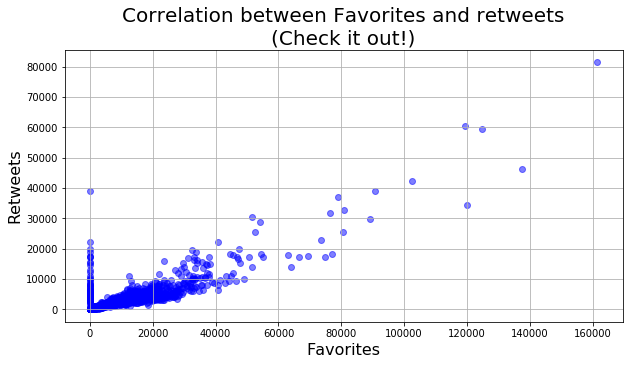

In [76]:
plt.figure(figsize=(10,5))
plt.scatter(tweet_corr['favorite_counts'], tweet_corr['retweet_counts'], color='b', alpha=0.5)
plt.xlabel('Favorites', fontsize=16)
plt.ylabel('Retweets', fontsize=16)
plt.title('Correlation between Favorites and retweets\n(Check it out!)', fontsize=20)
plt.grid()

plt.show()

Ruling out the outliers, as we can notice, there is a positive correlation between Favorites & Retweets.

In [77]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 0 to 2061
Data columns (total 27 columns):
tweet_id                 2062 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2062 non-null datetime64[ns]
source                   2062 non-null object
text                     2062 non-null object
expanded_urls            2062 non-null object
rating_numerator         2062 non-null float64
rating_denominator       2062 non-null float64
name                     1387 non-null object
stage                    2062 non-null object
time                     2062 non-null object
text_range               2062 non-null object
retweet_counts           2062 non-null object
favorite_counts          2062 non-null object
language                 2062 non-null object
jpg_url                  2062 non-null object
img_num                  2062 non-null int64
p1                       2062 non-null object
p1_conf     

In [78]:
final_merge.loc[:,['tweet_id','text','expanded_url','favorite_counts']].sort_values(by='favorite_counts', ascending= False).head(10)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,tweet_id,text,expanded_url,favorite_counts
841,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,161433
320,822872901745569793,Here's a super supportive puppo participating ...,NaN,137604
423,807106840509214720,This is Stephan. He just wants to help. such ...,NaN,124741
110,866450705531457537,This is Jamesy. He gives a kiss to every other...,NaN,119946
876,739238157791694849,Here's a doggo blowing bubbles. It's downright...,NaN,119267
59,879415818425184262,This is Duddles. He did an attempt. someone h...,NaN,102362
349,819004803107983360,This is Bo. He was a very good First Doggo. w...,NaN,90738
138,859196978902773760,We only rate dogs. This is quite clearly a smo...,NaN,89066
1490,678399652199309312,This made my day. please enjoy https://t.co/V...,NaN,80940
94,870374049280663552,This is Zoey. She really likes the planet. Wou...,NaN,80677


In [79]:
final_merge.loc[:,['tweet_id','text','expanded_url','retweet_counts']].sort_values(by='retweet_counts', ascending= False).head(10)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,tweet_id,text,expanded_url,retweet_counts
841,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,81392
876,739238157791694849,Here's a doggo blowing bubbles. It's downright...,NaN,60316
423,807106840509214720,This is Stephan. He just wants to help. such ...,NaN,59356
320,822872901745569793,Here's a super supportive puppo participating ...,NaN,46140
59,879415818425184262,This is Duddles. He did an attempt. someone h...,NaN,42272
349,819004803107983360,This is Bo. He was a very good First Doggo. w...,NaN,39036
346,819015337530290176,RT @dog_rates: This is Bo. He was a very good ...,NaN,39036
426,806629075125202948,"""Good afternoon class today we're going to lea...",NaN,37131
110,866450705531457537,This is Jamesy. He gives a kiss to every other...,NaN,34455
1490,678399652199309312,This made my day. please enjoy https://t.co/V...,NaN,32845


In [80]:
final_merge.loc[841,:]

tweet_id                                                744234799360020481
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2016-06-18 18:26:18
source                                                  Twitter for iPhone
text                     Here's a doggo realizing you can stand in a po...
expanded_urls            https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                        13
rating_denominator                                                      10
name                                                                   NaN
stage                                                                doggo
time                                        Sat Jun 18 18:26:18 +0000 2016
text_range                                                         [0, 91]
retweet_counts           

In [81]:
final_merge.loc[841,'expanded_urls']

'https://twitter.com/dog_rates/status/744234799360020481/video/1'

In [82]:
final_merge.loc[841,'text']

"Here's a doggo realizing you can stand in a pool.  enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"